<a href="https://colab.research.google.com/github/Bluceli1688/Instagram-likes/blob/main/Environmental_Impact_of_Food_Production_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 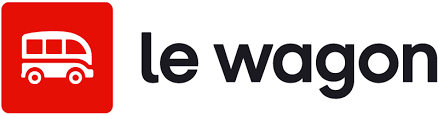

In [ ]:
#To connect the notebook to our folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime

import plotly.express as px

### Importing dataset

## Context
In this exercise, you will be working with a dataset that contains information about the ecological impact of a food product. The objective is to gain a deeper understanding of how our food consumption can affect nature.

---
## Importing data

1- Import the data with pandas

2- Download and import Food_Production.csv to colab

### Dataset Exploration

Let's explore the data

3- How many lines and columns the dataset has? Use the .shape method.

4- Use the .info() method to get summary of the columns.

**5- What information we can find about the dataset?**

In the dataset, we can find a variety of information about how our food consumption can impact nature. This includes data on factors such as the water requirements for producing one kilogram of a specific food type. This information is valuable for comparing different foods.

However, it's worth noting that there are some Null values present in our dataset. These missing values will need to be addressed during the feature engineering process.

6- Use .describe() method to get statical summary of the columns

**7- What are the first observations we can make about it? (missing values, NaNs, nulls, type)**


8- What are the names of the columns of the dataset?

**Do you think something should be done about it?**

The column names in the dataset exhibit inconsistencies, such as the usage of underscores, spaces, missing letters, and excessively long names. It would be beneficial to standardize and normalize the column names to ensure consistency and improve readability.

### Feature Engineering

Now that we have explored the dataset we are going to clean it up so we can work with it!

##### 9- Missing values

To replace the missing values, we can proceed with the following choices:

*   Note our discoveries and determine if we can have NaN values in the dataset
*   Replace missing values with a specific value or simply delete them
*   Use wisely the missing data to have as much information as possible


In our case, if we decided to delete all the rows that contains NaN value we'll lose too much information in our dataset. **Instead we'll keep all our information and make sure that we only gives non NaN values to our Data Vizualisation.**

Let's see how! Our goal is to only keep the rows that have no NaN values in the column "TestColumn". To do so, we'll simply select the rows without NaN value by using a mask like this :

```
dataset_to_use_in_viz = dataset[~np.isnan(dataset["TestColumn"])]
```
And now we can use dataset_to_use_in_viz freely!


##### 10- Negatives Values

Lately, many plantations/activities have been replaced by grasslands, abandoned pastures or just changed.

To replace the negatives values we can proceed with following choices:

*   Note our discoveries and provide scientific evidence regarding why they can be relevant
*   Replace all negative values with a chosen value, or delete them

To find out which are the negative values that belong to the numeric types we are going to use the method `select_dtypes`, which allows us to select only the data that belongs to the type we specify. For more information use this [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html).

**11- Write a code that will give you the number of negative values in the dataset.**

**12- In which dataset are these negative value ?**

**13- Replace the negative values with 0 and make sure that you do not have any negative values anymore.**

The column names in the dataset are quite inconsistent (some use underscores, other spaces, there are letters missing, etc.) and some columns have long names.

14- Rename all the columns with n uniform format. To do that, check the columns actual names by using the method `.columns` and then rename them by using `.rename()`


#### Data Transformation

##### **Create a "Category" column to cluster the different types of food products**

**14- Given the following lists, write some code that will assign the correct category to each products.**



```
Grains = ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"]
Nuts = ['Nuts', 'Groundnuts']
Vegetables = ["Potatoes", "Cassava", 'Other Pulses',"Peas",'Tomatoes', 'Onions & Leeks','Root Vegetables',"Brassicas",'Other Vegetables']
Fruits = ['Citrus Fruit', 'Bananas','Apples', 'Berries & Grapes', 'Other Fruit']
Sugars = ['Cane Sugar', 'Beet Sugar',]
Oils = ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil']
Dairy = ["Soymilk",'Milk', 'Cheese']
Animal_Prod = ['Beef (beef herd)', 'Beef (dairy herd)','Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)']
Other = ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
```



**15- Check how many values you have for each category.**

### Data Visualization

#### Greenhouse emissions

**16- Plot the Average Total emission by category using scatter plot**

#### Total emissions by food product

**17- Plot the Total emission by food product using a bar plot**


**18- Which types of food have more negative impact on the environment? What conclusions can youd draw?**


#### Total emissions by product category

**19- Plot the SUM of Total emission by Category using a bar plot**



**20- Plot the SUM of Total emission by Category using a pie chart**


#### 21- Which stage of food production contributes more to greenhouse gas emission?

**22- Plot the Total emission by supply chain using a bar chart**

Stages of supply chain:
1. Land usage
2. Farm
3. Animal Feed
4. Processing
5. Transport
6. Retail
7. Packaging

**23- Plot the Total emissions by Food Product using a bar plot. Add the Supply chain as color.**


**24- Plot the Total emissions by Food Product using a bar plot. Add the Category as color.**

**25- How can we promote sustainable and nutritious food production?**



**26- Plot a bar chart that displays the land used to produce 1 Kg of Food**

Be careful here! You might face some issues while working with NaN values. Make sure to follow the steps explained earlier!

**27- Plot a bar chart that displays the land used to produce 1000kcal for every food product**


**28- Plot a bar chart that displays the water used to produce 1000kcal for every food product**


**29- Plot a bar chart that displays the water used to produce 1Kg for every food product**

#### Heatmap to check the relation among different attributes of foods

### Conclusion

**30- What can be the strategy to reduce greenhouse gas emissions regarding our food consumption?**


